In [39]:
# for breast cancer
# import package
# -----------manipulate data package-----------
import pandas as pd
import numpy as np
# -----------machine learning package-----------
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from xgboost import XGBClassifier
# -----------ploting package-----------
import matplotlib
import matplotlib.pyplot as plt
# for plot showing log in xscale
matplotlib.rc('font', family='Arial')
%matplotlib inline 
# plot in jupyter

In [31]:
# load data csv or db
# load breast cancer dataset
cancer = load_breast_cancer()
data_ay = np.c_[cancer.data, cancer.target]

columns = np.append(cancer.feature_names, ["target"])
data = pd.DataFrame(data_ay, columns=columns)

cancered = data[data['target']==1].copy().reset_index(drop=True)
no_cancer = data[data['target']==0].copy().reset_index(drop=True)

print(len(no_cancer),len(cancered))

212 357


In [33]:
# X = dia_df.iloc[:,:-1].values
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [36]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [54]:
# 降維至2維以便視覺化

# 還有這麼多種PCA方式[SparsePCA,IncrementalPCA,MiniBatchSparsePCA,RandomizedPCA]
# 2018 03 08 需要再研究
# pca = PCA(n_components=2)
pca = KernelPCA(n_components=2,kernel='sigmoid')

["linear" , "poly" , "rbf" , "sigmoid" , "cosine" ]

"""
PCA 應用本身是基于一定假设
1. 線性。即特徵的變換是線性變換，作用有限，目前也有非線性的特徵變换kernel PCA。
2. 處理的數據分布是服從指数族概率密度函数，即能通過均值和斜方差来表徵數據的分布，\
因为只有在這個情况下信噪比和斜方差矩陣才能表示噪音和數據冗余。\
（好在實際應用中常見的數據是服從高斯分布或近似高斯分布(就是常態分布)）。

"""
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# lr = LogisticRegression()
lr = XGBClassifier(random_state=1,learning_rate=0.017)
lr = lr.fit(X_train_pca, y_train)

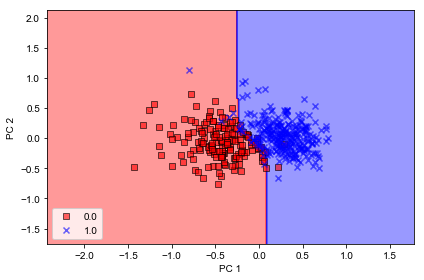

In [55]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()